In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/나눔고딕.ttf').get_name() #한글이 꺠지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import train_test_split

import mglearn

## 선형 회귀 모델

hypothesis : y = w[0] * x[0] + w[1] * x[1] + ... + b

w[0]: 0.393906  b: -0.031804


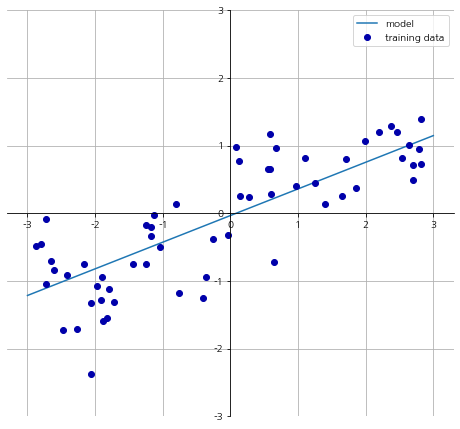

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.6700890315075756
테스트 점수 :  0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [1]:
# 주제 : 전기 생산량과 소비량
# 귀무가설 : 전기 생산량과 전기 소비량의 상관 관계가 없다.
# 대립가설 : 전기 생산량과 전기 소비량의 상관 관계가 있다.

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 생산량 4일때 사용량은 얼마인가?

In [3]:
from scipy import stats

result = stats.linregress(X,y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [4]:
slope, intercept, rv, pv, stderr = stats.linregress(X,y)
print(slope, intercept)

0.4956032360182905 0.9195814280689418


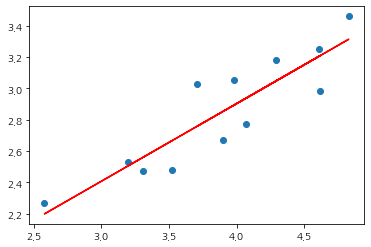

In [9]:
plt.scatter(X,y)
plt.plot(np.array(X), slope*np.array(X)+intercept,c='red')

In [10]:
# 생산량 4일 때 사용량은 얼마인가?
result = slope*4 + intercept
print("결과 : ", result)

결과 :  2.901994372142104


In [14]:
# 머신러닝 알고리즘 사용
num = np.array(X)
num = num.reshape(-1,1)

lr2 = LinearRegression()
lr2.fit(num, y)
print(lr2.coef_, ",", lr2.intercept_)

lr2.predict([[4]])

[0.49560324] , 0.919581428068942


array([2.90199437])

#### 고차원 특성에 대한 과적합

In [22]:
from mglearn.datasets import load_boston, load_extended_boston

X, y = mglearn.datasets.load_extended_boston()
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print('훈련 점수 : ', lr.score(X_train, y_train))
print('테스트 점수 : ', lr.score(X_test, y_test))

훈련 점수 :  0.9520519609032729
테스트 점수 :  0.607472195966585


### 릿지(Ridge) 회귀 모델

- L2 규제(Regularization)
- MSE항에 Penalty항 추가
- 알파를 크게 하면 패널티의 효과가 커지고(가중치 감소), 작게하면 그 반대가 된다.
- 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0).fit(X_train, y_train) # alpha=1.0
print('훈련 점수 : ', ridge.score(X_train, y_train))
print('테스트 점수 : ', ridge.score(X_test, y_test))

훈련 점수 :  0.8857966585170941
테스트 점수 :  0.7527683481744755


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 점수 : ', ridge10.score(X_train, y_train))
print('테스트 점수 : ', ridge10.score(X_test, y_test))

훈련 점수 :  0.7882787115369614
테스트 점수 :  0.6359411489177311


In [28]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 점수 : ', ridge01.score(X_train, y_train))
print('테스트 점수 : ', ridge01.score(X_test, y_test))

훈련 점수 :  0.9282273685001987
테스트 점수 :  0.7722067936479814


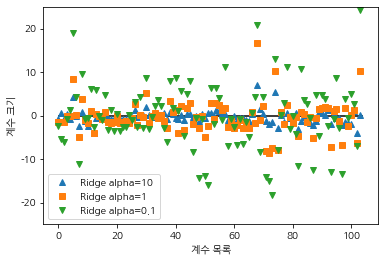

In [32]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

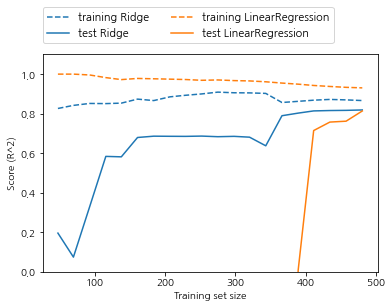

In [33]:
# 알파값을 1로 고정한 상태에서 데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()

### 라쏘(Lasso) 회귀 모델

- L1 규제 사용
- 알파를 크게하면 패널티의 효과가 커지고 작게하면 그 반대가 된다.
- 특성 선택이 자동으로 이루어진다

In [35]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso().fit(X_train, y_train) #alpha = 1.0
print('훈련 점수 : ', lasso.score(X_train, y_train))
print('테스트 점수 : ', lasso.score(X_test, y_test))
print('사용한 특성의 수 : ', np.sum(lasso.coef_ != 0))

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('훈련 점수 : ', lasso001.score(X_train, y_train))
print('테스트 점수 : ', lasso001.score(X_test, y_test))
print('사용한 특성의 수 : ', np.sum(lasso001.coef_ != 0))

훈련 점수 :  0.8962226511086497
테스트 점수 :  0.7656571174549983
사용한 특성의 수 :  33


In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('훈련 점수 : ', lasso00001.score(X_train, y_train))
print('테스트 점수 : ', lasso00001.score(X_test, y_test))
print('사용한 특성의 수 : ', np.sum(lasso00001.coef_ != 0))

훈련 점수 :  0.9507158754515467
테스트 점수 :  0.6437467421272709
사용한 특성의 수 :  96


### ElasticNet
- Ridge + Lasso

### Boston Sample을 이용한 다중 선형 회귀

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(boston.target)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [9]:
model_boston = LinearRegression().fit(boston.data, boston.target)

In [10]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [11]:
pred = model_boston.predict(boston.data)

Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

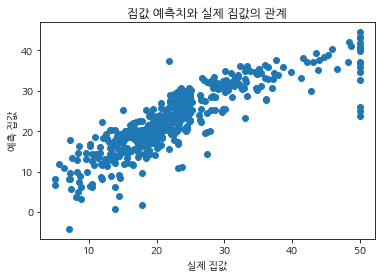

In [12]:
plt.scatter(boston.target, pred)
plt.xlabel('실제 집값')
plt.ylabel('예측 집값')
plt.title('집값 예측치와 실제 집값의 관계')

In [13]:
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df.head(10)

df["MEDV"] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\User_\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


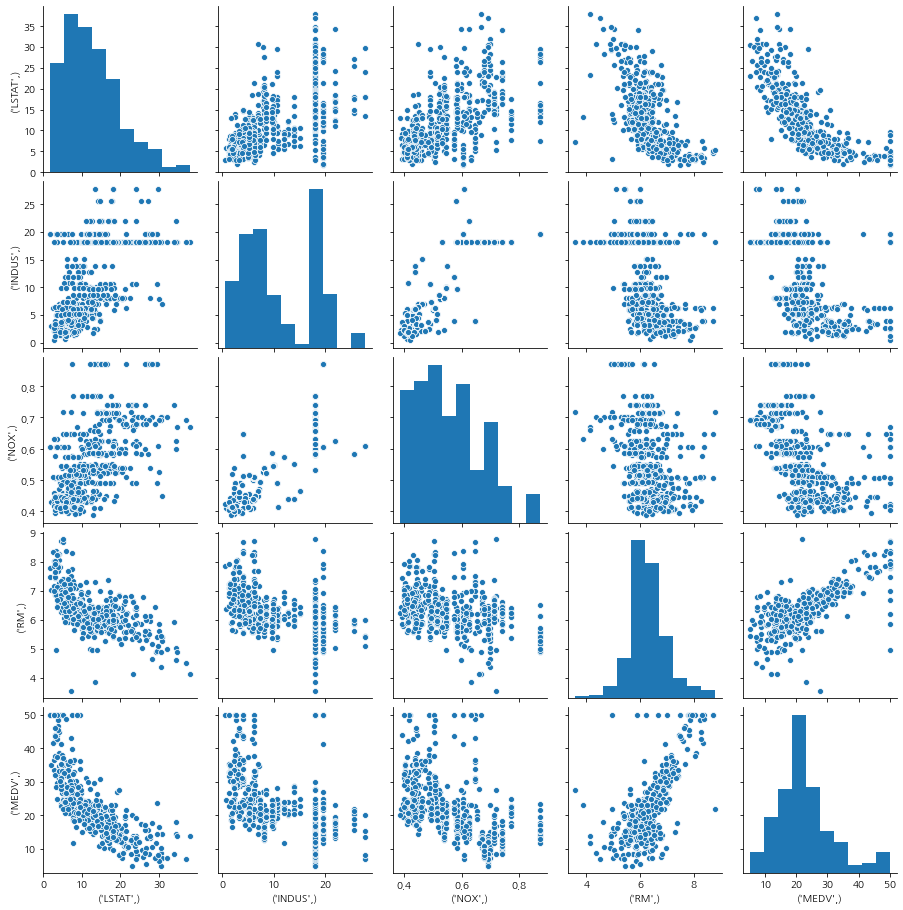

In [14]:
# seaborn의 pairplot
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols], size=2.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021195197640>,
      dtype=object)

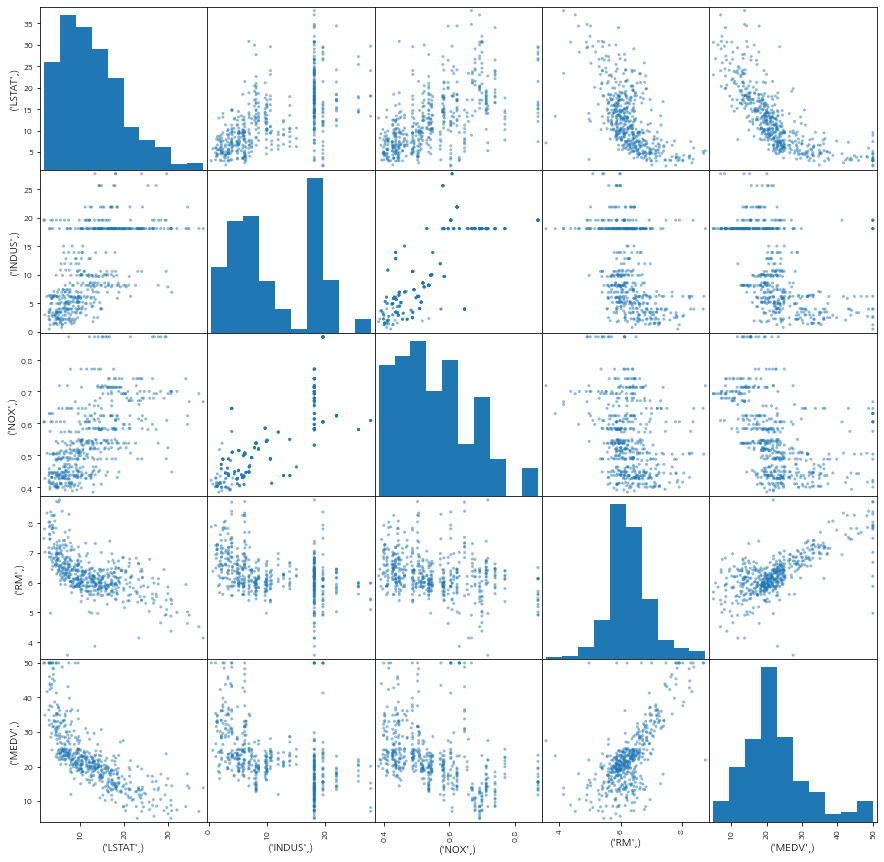

In [15]:
pd.plotting.scatter_matrix(df[cols], figsize=(15, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002386F36AD90>,
      dtype=object)

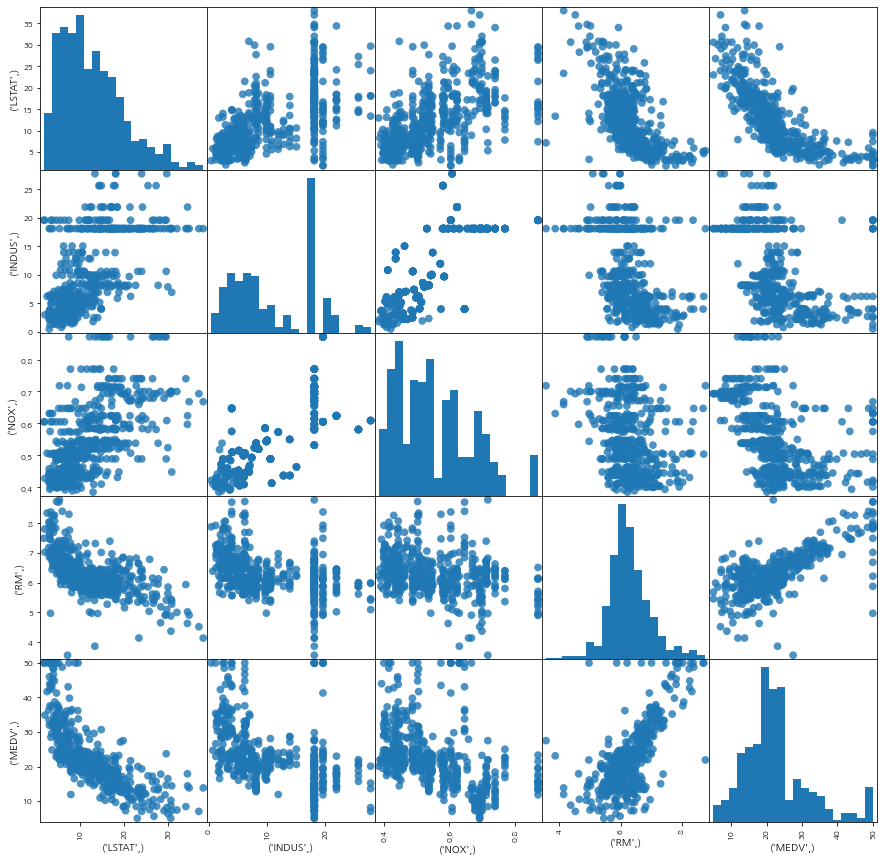

In [72]:
pd.plotting.scatter_matrix(df[cols], figsize=(15,15), marker="o", s=60,
                          cmap=mglearn.cm3, alpha=.8,
                          hist_kwds={'bins':20})

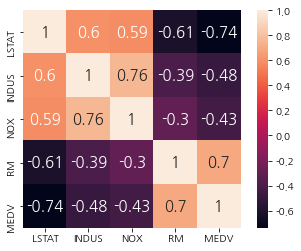

In [16]:
# seaborn의 heatmap

cc = np.corrcoef(df[cols].values.T)
cc
sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot=True, square=True,
           annot_kws={'size':15}) # annot=True 는 숫자보이게하는 옵션

In [71]:
# 방이 5개일 때 집값은 얼마인가?
X = df[["RM"]].values
y = df[["MEDV"]].values

lr = LinearRegression().fit(X,y)
print(lr.coef_, lr.intercept_)

house_price = lr.predict([[5]])

print('방이 [%d]인 주택가격은 약 [%.f]달러이다.'%(5, house_price*1000))

[[9.10210898]] [-34.67062078]
방이 [5]인 주택가격은 약 [10840]달러이다.


## 로지스틱 선형 회귀

- L2 norm 규제를 사용
- C 파라미터 사용해서 규제의 강도를 설정

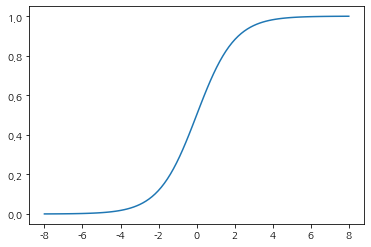

In [77]:
# sigmoid 함수 그래프 그리기

def sigmoid(x):
    result = []
    for i in x:
        result.append(1/(1+np.exp(-i)))
        
    return result

X = np.linspace(-8, 8, 100)
sig = sigmoid(X)

plt.plot(X, sig)

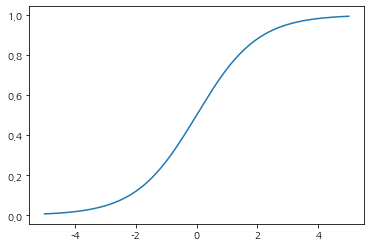

In [79]:
X = np.linspace(-5, 5, 1000)
plt.plot(X, 1/(1+np.exp(-X)))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\User_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


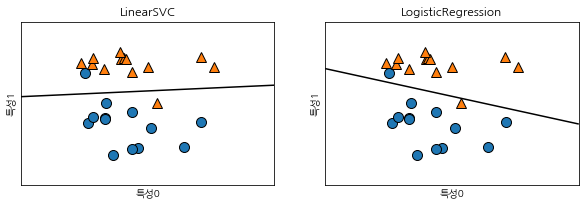

In [18]:
X, y = mglearn.datasets.make_forge()
_, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")

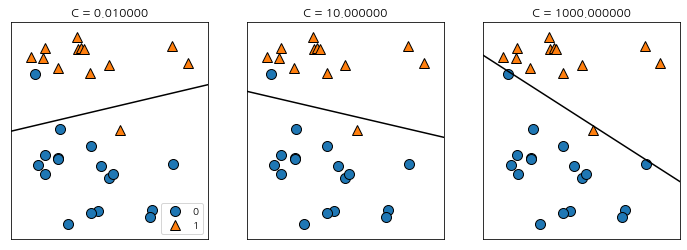

In [19]:
mglearn.plots.plot_linear_svc_regularization()

#### C값에 따른 결과

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42)

In [22]:
logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000).fit(X_train, 
                                                                   y_train)
print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.965034965034965


In [23]:
logreg100 = LogisticRegression(C=100, penalty="l2", max_iter=10000).fit(X_train, 
                                                                   y_train)
print("훈련 점수 : ", logreg100.score(X_train, y_train))
print("테스트 점수 : ", logreg100.score(X_test, y_test))

훈련 점수 :  0.9788732394366197
테스트 점수 :  0.965034965034965


In [24]:
logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=10000).fit(X_train, 
                                                                   y_train)
print("훈련 점수 : ", logreg001.score(X_train, y_train))
print("테스트 점수 : ", logreg001.score(X_test, y_test))

훈련 점수 :  0.9460093896713615
테스트 점수 :  0.972027972027972


In [25]:
# 'newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
#‘liblinear’ and ‘saga’ also handle L1 penalty

logreg_l1 = LogisticRegression(C=1, penalty="l1", max_iter=10000, 
                               solver="liblinear").fit(X_train, y_train)
print("훈련 점수 : ", logreg_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1.score(X_test, y_test))

훈련 점수 :  0.960093896713615
테스트 점수 :  0.958041958041958


In [26]:
logreg100_l1 = LogisticRegression(C=100, penalty="l1", max_iter=10000, 
                               solver="liblinear").fit(X_train, y_train)
print("훈련 점수 : ", logreg100_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg100_l1.score(X_test, y_test))

훈련 점수 :  0.9882629107981221
테스트 점수 :  0.972027972027972


In [27]:
logreg001_l1 = LogisticRegression(C=0.01, penalty="l1", max_iter=10000, 
                               solver="liblinear").fit(X_train, y_train)
print("훈련 점수 : ", logreg001_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg001_l1.score(X_test, y_test))

훈련 점수 :  0.9107981220657277
테스트 점수 :  0.951048951048951


#### KNN, LogisticRegression, LinearSVC의 성능비교

In [30]:
dir(cancer)
cancer.data.shape
cancer.feature_names
cancer.target_names # malignant(악성), benign(양성)
np.bincount(cancer.target)
# cancer.target[cancer.target==0].shape

array([212, 357], dtype=int64)

In [31]:
# LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                   random_state=0)
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.951048951048951


In [32]:
# LinearSVC
scores = []

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print("scores = ", scores)
print(np.mean(np.array(scores)))

C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

scores =  [0.9440559440559441, 0.9090909090909091, 0.8671328671328671, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.951048951048951, 0.9370629370629371, 0.9440559440559441]
0.9328671328671329


C:\Users\User_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.9370629370629371


([<matplotlib.axis.XTick at 0x21194f9d310>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

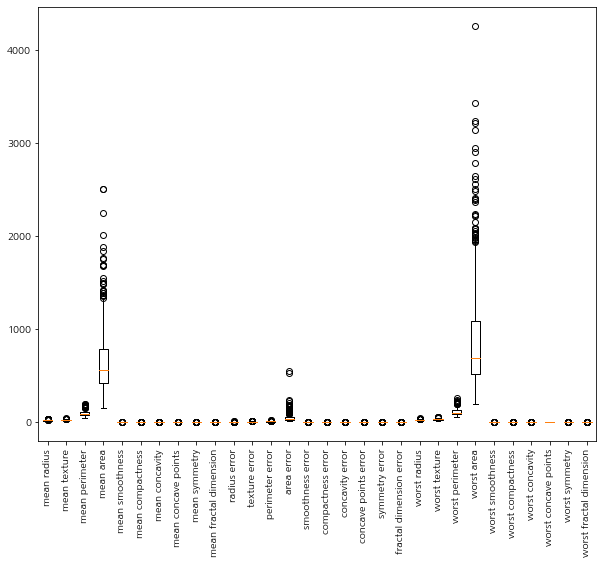

In [34]:
# 이상치 검출을 위한 boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [36]:
### standardization

# 속성별 평균
m = cancer.data.mean(axis=0)

# 속성별 표준편차
s = cancer.data.std(axis=0)

data1 = (cancer.data - m) / s

([<matplotlib.axis.XTick at 0x211978f61f0>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

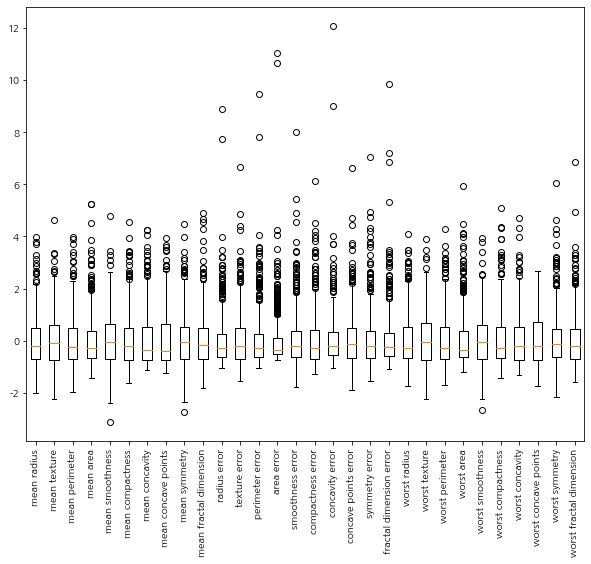

In [39]:
plt.figure(figsize=(10, 8))
plt.boxplot(data1)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [40]:
# LogisticRegression에 표준화 적용

X_train, X_test, y_train, y_test = train_test_split(data1, 
                                                    cancer.target,
                                                   random_state=0)
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.965034965034965


In [41]:
# LinearSVC에 표준화 적용

scores = []

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target,
                                                   random_state=0)

for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print("scores = ", scores)
print(np.mean(np.array(scores)))

scores =  [0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441]
0.944055944055944


In [42]:
# KNN에 표준화 적용

from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target,
                                                   random_state=0)

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.951048951048951


In [ ]:
# C값을 100으로 설정

X_train, X_test, y_train, y_test = train_test_split(data1,
                                                   cancer.target,
                                                   random_state=0)
model = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

In [ ]:
# C값 조정

score = []

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target,
                                                   random_state=0)

for i in range(10):
    model = LinearSVC(C=0.01, max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print("scores = ", scores)
print(np.mean(np.arrary(scores)))

---
# 다중 클래스분류

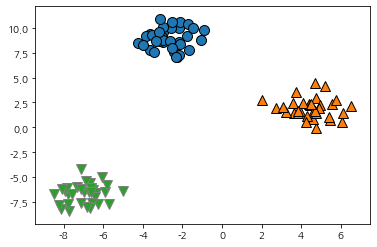

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [22]:
linear_svc = LinearSVC().fit(X, y)
print(linear_svc.coef_)
print(linear_svc.coef_[0])
print(linear_svc.coef_[1])
print(linear_svc.intercept_)

[[-0.17492614  0.23141075]
 [ 0.47621997 -0.06937369]
 [-0.18914448 -0.2039973 ]]
[-0.17492614  0.23141075]
[ 0.47621997 -0.06937369]
[-1.07745485  0.13140539 -0.08604854]


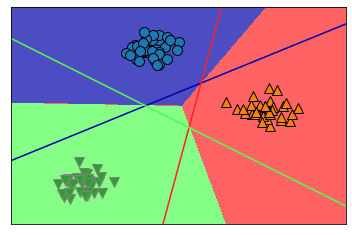

In [21]:
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, 
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
    

---
### 적합도 검정 (성능 측정)

- Accuracy : 정확도(모든 데이터들 중에서)
    - (TN + TP) / (TN + FP + FN + TP)
     
     
- Precision : 정확도(양성인 것들 중에서 실제값이 양성과 같은 데이터의 비율)
    - TP / (FP + TP)
    
    
- Recall : 재현율(실제 값이 양성인것들 중에서 예측과 실제값이 양성으로 일치한 비율)
    - TP / (FN + TP)
    
    
- F1 Score
    - 정밀도와 재현율의 조화평균
    
    
- ROC와 AUC

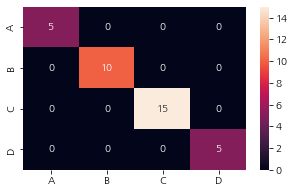

In [26]:
arr = [[5,0,0,0,],
      [0,10,0,0],
      [0,0,15,0],
      [0,0,0,5]]

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

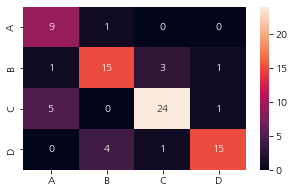

In [46]:
arr = [[9, 1, 0, 0],
      [1, 15, 3, 1],
      [5, 0, 24, 1],
      [0, 4, 1, 15]]

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm
plt.figure(figsize=(5, 3))
sns.heatmap(df_cm, annot=True)

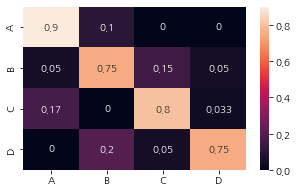

In [47]:
# 정규화

total = np.sum(arr, axis=1)
total
arr = arr / total[:, None]
arr

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [31]:
y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]

confusion_matrix(y_true, y_pred, labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]

print(classification_report(y_true, y_pred,
                           target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



### ROC curve(with AUC)

In [44]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0,
                           random_state=0)
X[:10, :]
y[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [49]:
model = LogisticRegression().fit(X,y)

In [50]:
y_hat = model.predict(X)

In [51]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [62]:
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [63]:
print(classification_report(y, y_hat, target_names=["class0", "class1"]))

              precision    recall  f1-score   support

      class0       0.94      0.96      0.95       497
      class1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [64]:
# ROC곡선
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Rate(Recall)')

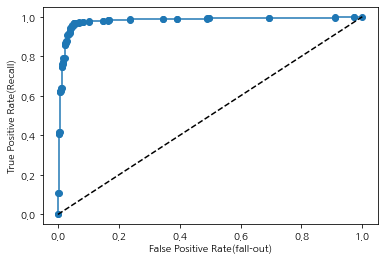

In [66]:
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
# fpr : 1-특이도 , tpr : 재현율

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0,1],[0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(Recall)")

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, model.decision_function(X))

0.9795592641335089

# 사례1 : 타이타닉 예제
- 성능을 제대로 측정했는지에 대한 관점

In [116]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
# 전처리가 필요없는 컬럼
cols_to_keep = ["Survived", "Age", "Fare"]

In [118]:
# Pclass의 더미변수화(one hot encoding)
dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass")
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [119]:
# Sex의 더미변수화
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [120]:
# 변수 합치기
df1 = df[cols_to_keep].join(dummy_class.loc[:, "Pclass1":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [121]:
df1 = df1.join(dummy_sex.loc[:, "Sex_male"])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [122]:
# Survived를 제외한 나머지 컬럼(특성) 추출
train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [123]:
# 결측치 확안
np.isnan(df1[train_cols])
df1.isnull().sum()

# 결측치 삭제
# df1[train_cols] = df1[train_cols].dropna(axis=0)
# df1["Survived"] = df1["Survived"].dropna(axis=0)

# 0으로 대체
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)

In [124]:
import statsmodels.api as sm

In [125]:
model = sm.Logit(df1["Survived"], df1[train_cols]).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2021-01-12 12:37 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [126]:
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

In [127]:
df1["predict"] = model2.predict(df1[train_cols])
df1.head(40)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


In [128]:
confusion_matrix(df1["Survived"], df1["predict"], labels=[1, 0])

array([[242, 100],
       [ 93, 456]], dtype=int64)

In [129]:
# 일단 정확도를 확인
print("정확도 : ", model2.score(df1[train_cols], df1["Survived"]))
print("정확도 : ", (242 + 456) / (242 + 100 + 93 + 456))

정확도 :  0.7833894500561167
정확도 :  0.7833894500561167


In [130]:
print(classification_report(df1["Survived"], df1["predict"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Rate(Recall)')

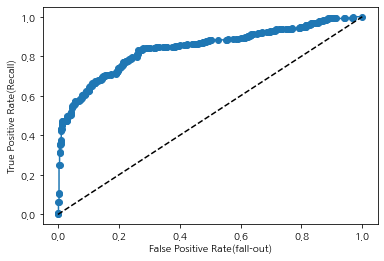

In [131]:
fpr, tpr, thresholds = roc_curve(df1["Survived"], 
                                 model2.decision_function(df1[train_cols]))

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0,1],[0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(Recall)")

In [132]:
roc_auc_score(df1["Survived"], model2.decision_function(df1[train_cols]))

0.8414235345497928